Activity
(Tuesday)

Linear Regression
X-y split (y is the target variable, in this case, "total claim amount")
Train-test split.
Standardize the data (after the data split!).
Apply linear regression.
Model Interpretation.


(Wednesday)
Model Validation
Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.


Model Iteration (Wednesday and Thursday)
Rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).
(Optional) Rerun the model after removing the outliers and compare the results using the R2.

In [1]:
#Importing libraries and data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split

file_path = '/Users/jameskenny/Documents/GitHub/Ironhack_Labs/Week 4/marketing_customer_analysis_clean (1).csv'
df = pd.read_csv(file_path)


In [2]:
numericals_df = df.select_dtypes(include='number')

In [3]:
#correlation
corr_matrix = numericals_df.corr()

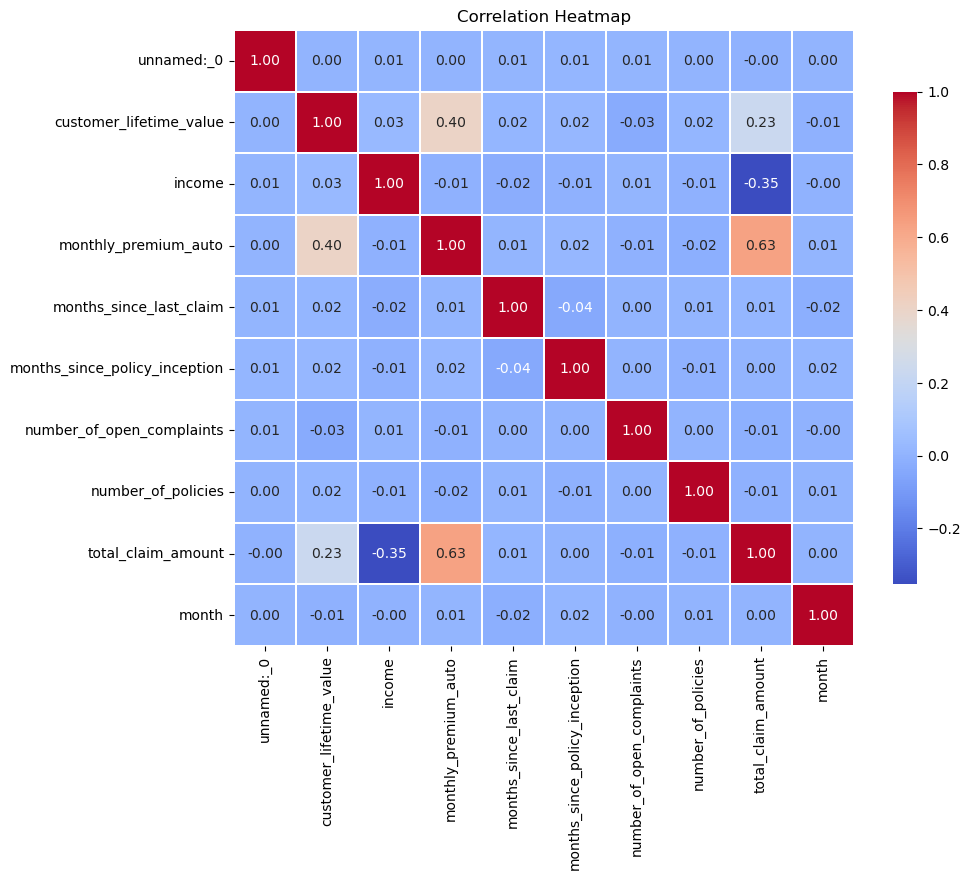

In [4]:
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')  # Optional: Add a title to your heatmap
plt.show()


In [5]:
#correlations with "total_claim_amount"
#monthly_premium_auto = 0.63
#income = -0.35
#customer_lifetime_value = 0.23

In [6]:
#define X and Y
X = df[["monthly_premium_auto","income","customer_lifetime_value"]]
y = df[["total_claim_amount"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [7]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [8]:
y_test

,total_claim_amount
4829,475.423848
5081,350.400000
5011,482.400000
4625,673.342650
3838,302.400000
...,...
7450,460.266881
4715,405.883346
8581,41.182611
211,364.800000


In [9]:
#Standardizing data
#I will first create the regression without standardizing the data.
#After I will standardize the data and repeat the regression to see its effect on the result

In [10]:
#Linear regression
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
model = lm.fit(X_train, y_train)



In [11]:
#Coefficients/slopes
model.coef_

array([[ 5.38729448e+00, -3.29293783e-03, -6.22169493e-04]])

In [12]:
#Intercept
model.intercept_

array([60.2885863])

In [13]:
#predict total_claim_amount for random sample
random_sample = X_test.sample()

In [14]:
random_sample

,monthly_premium_auto,income,customer_lifetime_value
10788,117,11689,4163.79336


In [15]:
model.predict(random_sample)

array([[649.52030479]])

In [16]:
#Predictions for test set

In [17]:
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,129.326645
1,343.739470
2,419.892382
3,432.855501
4,153.304914
...,...
2723,590.144085
2724,305.966285
2725,200.925739
2726,464.678874


In [18]:
y_test = y_test.reset_index(drop=True)
y_test

,total_claim_amount
0,475.423848
1,350.400000
2,482.400000
3,673.342650
4,302.400000
...,...
2723,460.266881
2724,405.883346
2725,41.182611
2726,364.800000


In [19]:
residuals_df = pd.concat([y_test,y_pred], axis = 1)

In [20]:
residuals_df

,total_claim_amount,0
0,475.423848,129.326645
1,350.400000,343.739470
2,482.400000,419.892382
3,673.342650,432.855501
4,302.400000,153.304914
...,...,...
2723,460.266881,590.144085
2724,405.883346,305.966285
2725,41.182611,200.925739
2726,364.800000,464.678874


In [21]:
residuals_df = residuals_df.rename(columns = {"total_claim_amount":"y_test", 0:"y_pred"})
residuals_df

,y_test,y_pred
0,475.423848,129.326645
1,350.400000,343.739470
2,482.400000,419.892382
3,673.342650,432.855501
4,302.400000,153.304914
...,...,...
2723,460.266881,590.144085
2724,405.883346,305.966285
2725,41.182611,200.925739
2726,364.800000,464.678874


In [22]:
residuals_df["residual"] = residuals_df["y_test"] - residuals_df["y_pred"]

In [23]:
residuals_df.head()

,y_test,y_pred,residual
0,475.423848,129.326645,346.097203
1,350.400000,343.739470,6.660530
2,482.400000,419.892382,62.507618
3,673.342650,432.855501,240.487149
4,302.400000,153.304914,149.095086


In [24]:
#Calculating metrics

In [25]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [26]:
mean_error = residuals_df["residual"].mean()
mean_error

4.473133468844049

In [32]:
mae_n = mae(y_test,y_pred)
mae_n

145.86232150855594

In [33]:
mse_n = mse(y_test,y_pred)
mse_n

40414.19485725172

In [34]:
rmse_n = mse(y_test,y_pred, squared = False)
rmse_n

201.03282034844887

-------------------------------------------------------------------------------------------------------------------
Standardizing Data

array([[<Axes: title={'center': 'monthly_premium_auto'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'customer_lifetime_value'}>, <Axes: >]],
      dtype=object)

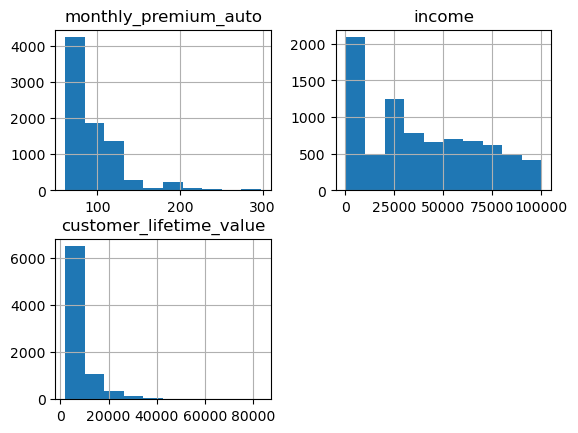

In [35]:
X_train.hist()

In [36]:
#Standardizing data

In [37]:
#Standard scaler
standard_scaler = StandardScaler()
#Standardizing X_train
standard_scaler.fit(X_train)
X_train_s = pd.DataFrame(standard_scaler.transform(X_train))
#Standardizing X_test *** ensuring to use same scaler from X_train
X_test_s = pd.DataFrame(standard_scaler.transform(X_test))


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

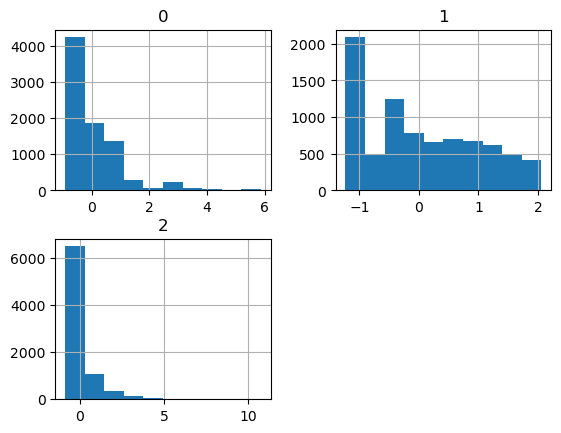

In [38]:
X_train_s.hist()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

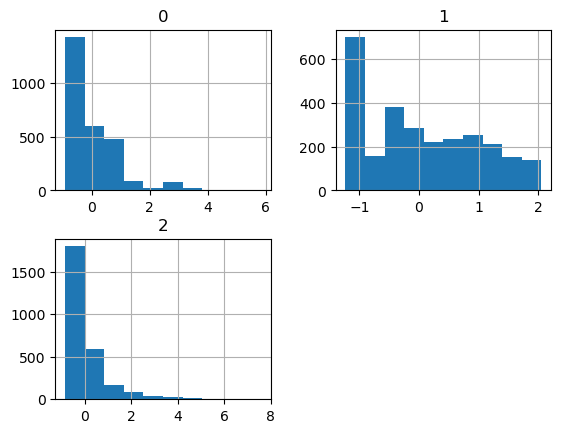

In [39]:
X_test_s.hist()

In [40]:
#Linear regression with standardized X_train
lm_s = LinearRegression()
model_s = lm_s.fit(X_train_s, y_train)



In [41]:
#Coefficients/slopes
print(model.coef_) #before standardizing
print(model_s.coef_) #after standardizing

[[ 5.38729448e+00 -3.29293783e-03 -6.22169493e-04]]
[[187.78180556 -99.99706425  -4.35724959]]


In [42]:
#Intercept
print(model.intercept_) #before standardizing
print(model_s.intercept_) #after standardizing

[60.2885863]
[434.60833836]


In [43]:
#Predictions for test set

In [44]:
y_pred_s = model_s.predict(X_test_s)
y_pred_s = pd.DataFrame(y_pred_s)
y_pred_s

,0
0,129.326645
1,343.739470
2,419.892382
3,432.855501
4,153.304914
...,...
2723,590.144085
2724,305.966285
2725,200.925739
2726,464.678874


In [45]:
residuals_df_s = pd.concat([y_test,y_pred_s], axis = 1)

In [46]:
residuals_df_s = residuals_df_s.rename(columns = {"total_claim_amount":"y_test", 0:"y_pred_s"})
residuals_df_s

,y_test,y_pred_s
0,475.423848,129.326645
1,350.400000,343.739470
2,482.400000,419.892382
3,673.342650,432.855501
4,302.400000,153.304914
...,...,...
2723,460.266881,590.144085
2724,405.883346,305.966285
2725,41.182611,200.925739
2726,364.800000,464.678874


In [47]:
residuals_df_s["residual"] = residuals_df_s["y_test"] - residuals_df_s["y_pred_s"]
residuals_df_s

,y_test,y_pred_s,residual
0,475.423848,129.326645,346.097203
1,350.400000,343.739470,6.660530
2,482.400000,419.892382,62.507618
3,673.342650,432.855501,240.487149
4,302.400000,153.304914,149.095086
...,...,...,...
2723,460.266881,590.144085,-129.877204
2724,405.883346,305.966285,99.917061
2725,41.182611,200.925739,-159.743128
2726,364.800000,464.678874,-99.878874


In [48]:
residuals_df #comparing to non standarized

,y_test,y_pred,residual
0,475.423848,129.326645,346.097203
1,350.400000,343.739470,6.660530
2,482.400000,419.892382,62.507618
3,673.342650,432.855501,240.487149
4,302.400000,153.304914,149.095086
...,...,...,...
2723,460.266881,590.144085,-129.877204
2724,405.883346,305.966285,99.917061
2725,41.182611,200.925739,-159.743128
2726,364.800000,464.678874,-99.878874


In [49]:
#Calculating metrics
mean_error_s = residuals_df_s["residual"].mean()
mean_error_s


4.473133468844114

In [52]:
mae_s = mae(y_test,y_pred_s)
print(mae_n)
print(mae_s)

145.86232150855594
145.86232150855594


In [53]:
mse_s = mse(y_test,y_pred_s)
print(mse_n)
print(mse_s)

40414.19485725172
40414.19485725172


In [54]:
rmse = mse(y_test,y_pred, squared = False)
rmse_s = mse(y_test,y_pred_s, squared = False)
print(rmse)
print(rmse_s)

201.03282034844887
201.03282034844887


Note: originally tried to standardize data with a standard scaler but after reviewing,
i think powertransform would be better due to the skew in the data histograms

Standardscaler appeared to have no effect on model accuracy

In [55]:
#Power Transform
power_transformer = PowerTransformer(method='yeo-johnson')
power_transformer.fit(X_train)
X_train_p = pd.DataFrame(power_transformer.transform(X_train))
X_test_p= pd.DataFrame(power_transformer.transform(X_test))

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

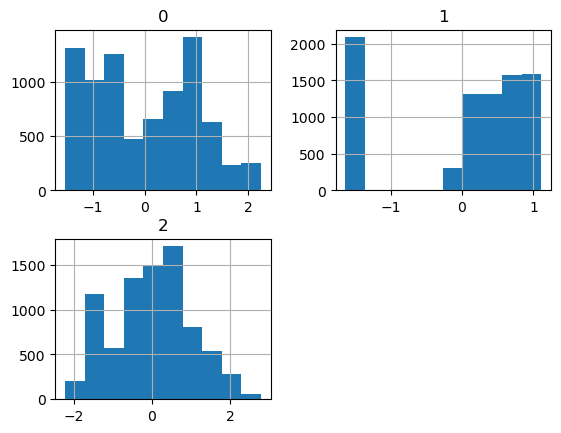

In [56]:
X_train_p.hist()

In [57]:
#Linear regression with standardized X_train
lm_p = LinearRegression()
model_p = lm_p.fit(X_train_p, y_train)



In [58]:
#Coefficients/slopes
print(model.coef_) #before standardizing
print(model_s.coef_) #after standardizing
print(model_p.coef_) #after standardizing

[[ 5.38729448e+00 -3.29293783e-03 -6.22169493e-04]]
[[187.78180556 -99.99706425  -4.35724959]]
[[ 155.23305194 -103.63639822    6.60446476]]


In [59]:
#Intercept
print(model.intercept_) #before standardizing
print(model_s.intercept_) #after standardizing
print(model_p.intercept_) #after standardizing

[60.2885863]
[434.60833836]
[434.60833836]


In [60]:
#Predictions for test set

In [61]:
y_pred_p = model_p.predict(X_test_p)
y_pred_p = pd.DataFrame(y_pred_p)
y_pred_p

,0
0,224.660922
1,301.146927
2,436.526356
3,504.197448
4,149.327599
...,...
2723,576.532288
2724,257.476185
2725,304.585270
2726,548.389268


In [62]:
residuals_df_p = pd.concat([y_test,y_pred_p], axis = 1)

In [63]:
residuals_df_p = residuals_df_p.rename(columns = {"total_claim_amount":"y_test", 0:"y_pred_p"})
residuals_df_p

,y_test,y_pred_p
0,475.423848,224.660922
1,350.400000,301.146927
2,482.400000,436.526356
3,673.342650,504.197448
4,302.400000,149.327599
...,...,...
2723,460.266881,576.532288
2724,405.883346,257.476185
2725,41.182611,304.585270
2726,364.800000,548.389268


In [64]:
residuals_df_p["residual"] = residuals_df_p["y_test"] - residuals_df_p["y_pred_p"]
residuals_df_p

,y_test,y_pred_p,residual
0,475.423848,224.660922,250.762926
1,350.400000,301.146927,49.253073
2,482.400000,436.526356,45.873644
3,673.342650,504.197448,169.145202
4,302.400000,149.327599,153.072401
...,...,...,...
2723,460.266881,576.532288,-116.265407
2724,405.883346,257.476185,148.407161
2725,41.182611,304.585270,-263.402659
2726,364.800000,548.389268,-183.589268


In [65]:
#Calculating metrics
mean_error_p = residuals_df_p["residual"].mean()
print(mean_error)
print(mean_error_s)
print(mean_error_p)


4.473133468844049
4.473133468844114
0.6565596173760625


In [67]:
mae_p = mae(y_test,y_pred_p)
print(mae_n)
print(mae_s)
print(mae_p)


145.86232150855594
145.86232150855594
152.51014099098097


In [69]:
mse_p = mse(y_test,y_pred_p)

print(mse_n)
print(mse_s)
print(mse_p)


40414.19485725172
40414.19485725172
45745.52958183372


In [70]:
rmse = mse(y_test,y_pred, squared = False)
rmse_p = mse(y_test,y_pred_p, squared = False)
print(rmse)
print(rmse_s)
print(rmse_p)

201.03282034844887
201.03282034844887
213.88204595485269


In [72]:
#joining dfs to show comparison of results using different scalers/transforms
comparison_df = pd.concat([residuals_df,residuals_df_s,residuals_df_p], axis = 1)

In [74]:
comparison_df.head()

,y_test,y_pred,residual,y_test,y_pred_s,residual,y_test,y_pred_p,residual
0,475.423848,129.326645,346.097203,475.423848,129.326645,346.097203,475.423848,224.660922,250.762926
1,350.400000,343.739470,6.660530,350.400000,343.739470,6.660530,350.400000,301.146927,49.253073
2,482.400000,419.892382,62.507618,482.400000,419.892382,62.507618,482.400000,436.526356,45.873644
3,673.342650,432.855501,240.487149,673.342650,432.855501,240.487149,673.342650,504.197448,169.145202
4,302.400000,153.304914,149.095086,302.400000,153.304914,149.095086,302.400000,149.327599,153.072401


In [86]:
#Printing results of error comparison between different scalers/transforms
print(f'Mean error comparison:\n  no scaler/transform:  {round(mean_error,2)}\n  standard scaler:      {round(mean_error_s,2)}\n  power transform:      {round(mean_error_p,2)}')



Mean error comparison:
  no scaler/transform:  4.47
  standard scaler:      4.47
  power transform:      0.66
